## Training, Cross-Validation, and Testing

## Main Concepts:
- 1. Train the models using the training dataset to find the best paramaters w,b.
- 2. Make cross-validation to tell which model performs the best in unseen data.
- 3. Test the chosen model againts the testing dataset to estimate its general performance.

In [1]:
import numpy as np
import pandas as pd
import neural_network
import matplotlib.pyplot as plt

#### 01- Generate dataset

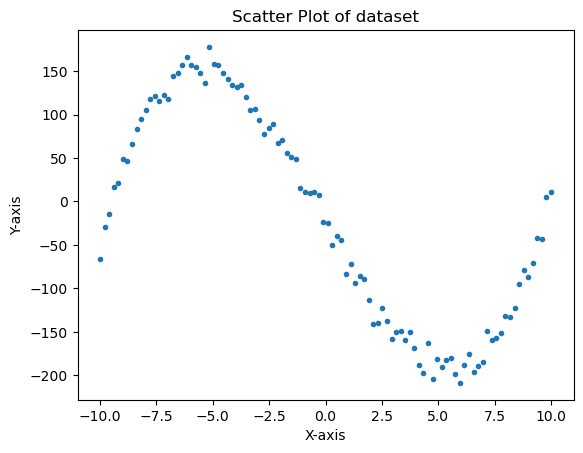

In [2]:
x =np.linspace(-10,  10, 100, dtype=float, axis= 0)                 #
y = .5*x**3 + -20*x*2 + -7*x + -20 + np.random.normal(size=100)*10  # Polynomial function with with some noise added.

# Plot data:
# Create a scatter plot with a red dashed line
plt.scatter(x, y, marker='.')
# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of dataset')
#plt.grid(True)
plt.show()


In [3]:
df = pd.DataFrame(data= {'x':x, 'y':y})
df.head()

,x,y
0,-10.000000,-66.706635
1,-9.797980,-28.967981
2,-9.595960,-14.918535
3,-9.393939,16.114140
4,-9.191919,21.523184


### 02. Define Models

Let us define some Neural Network models with different architectures

In [245]:
# Model 01:
layer_01 = neural_network.NN_Layer(units=5, layer='layer_01', activation_func='relu')       # 1st hidden layer, 5 perceptrons, and ReLU activation function 
layer_02 = neural_network.NN_Layer(units=10, layer='layer_02', activation_func='relu')      
layer_03 = neural_network.NN_Layer(units=1, layer='layer_03', activation_func='linear')     # Output Layer, linear activation function.

nn_reg_model_01 = neural_network.NN([layer_01, layer_02, layer_03])

In [153]:
# Model 02:
l_01 = neural_network.NN_Layer(units=30, layer='layer_01', activation_func='relu')
l_02 = neural_network.NN_Layer(units=1, layer='layer_02', activation_func='linear')

nn_reg_model_02 = neural_network.NN([l_01, l_02])

### 03 Train the models

#### 03.01- Methodology One
Split the data into `training` and `testing` datasets

In [7]:
# Training dataset: 70% , testing dataset: 30%

# Train:
df_train_01 = df.sample(frac=.7, replace=False, random_state=0)

# Test:
df_test_01 = df[~df.index.isin(df_train_01.index)]

Train models

In [267]:
# Train model 01:
nn_reg_model_01.train(features=df_train_01['x'].values.reshape(-1,1), 
                      labels=df_train_01['y'].values.reshape(-1,1),
                      alpha=1e-5,
                      n_iterations=10000,
                      print_cost=True)

[16031.57979453]
[2616.46103088]
[1099.77870184]
[684.55774863]
[625.84692853]
[498.5001487]
[347.18549838]
[282.90339195]
[219.97647151]
[195.43803677]


In [181]:
# Train model 02:
nn_reg_model_02.train(features=df_train_01['x'].values.reshape(-1,1), 
                      labels=df_train_01['y'].values.reshape(-1,1),
                      alpha=1e-5,
                      n_iterations=10000,
                      print_cost=True)

[42290.22242371]
[1411.55449633]
[835.80631892]
[624.85926232]
[502.15407712]
[426.99914688]
[377.73611738]
[345.47584466]
[294.09661526]
[259.46677764]


Evaluate models

In [268]:
# Making predictions using the models:

y_hat_1_model_01 = nn_reg_model_01.predict(x = df_test_01['x'].values.reshape(-1,1))
y_hat_1_model_02 = nn_reg_model_02.predict(x = df_test_01['x'].values.reshape(-1,1))

In [269]:
# Calculating the mean squared error:

def error(y_hat, y_test):
    m = len(y_hat)
    return (1/m)*np.sum((y_hat - y_test)**2)


In [272]:
# Model 01:
print(
    f'Error of the Model 01 in the testing dataset: \n\t{error(y_hat_1_model_01, df_test_01["y"].values.reshape(-1,1))}')

# Model 02:
print(
    f'Error of the Model 02 in the testing dataset: \n\t{error(y_hat_1_model_02, df_test_01["y"].values.reshape(-1,1))}')


Error of the Model 01 in the testing dataset: 
	427.219613369186
Error of the Model 02 in the testing dataset: 
	296.41625423345266


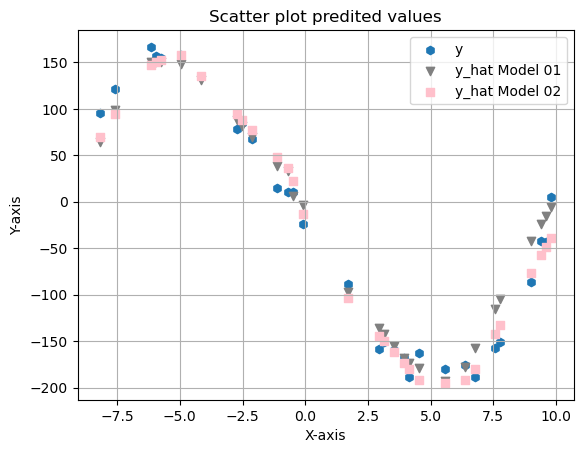

In [273]:
# Create a scatter plot with a red dashed line
plt.scatter(df_test_01['x'].values.reshape(-1,1), df_test_01['y'].values.reshape(-1,1), marker='h', label='y')
plt.scatter(df_test_01['x'].values.reshape(-1,1), y_hat_1_model_01, marker='v', label ='y_hat Model 01', color='gray')
plt.scatter(df_test_01['x'].values.reshape(-1,1), y_hat_1_model_02, marker='s', label='y_hat Model 02', color='pink')
# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter plot predited values')
plt.legend()
plt.grid(True)
plt.show()

`Model 01` does better fitting the training dataset [`trainning_cost: 195.438`], but `Model 02` achieves the best performance making generalization [`error_testing: 296.4`]. <br>
Thus `Model 02` should be the selected model.

#### Recap:
- Two different models were trained using the `training dataset`. When being trained, the training dataset was used to determine the best values of $Ws$ and $b$ to minimize the cost.<br>
- Then a `test dataset` was used to choose between the two models architecture. `Model 02` achived a better perfomance generalizing at the testing dataset.

But what is the estimation of `Model 02` performance?<br>
Estimate Model 2 performance using the testing set, that has already been seen by the model when selecting the best model, would misslead to an optimistic estimation of performance.<br>
<br>
**To estimate the general performance of `Model 02`, an another unseen dataset is necessary.**

#### 03.02- Methodology Two
Split the data into `training`, `Cross-Calidation`, `Testing` datasets

Spliting the dataset into train, cross-validation and testing sets, allow one more dataset to estimate properly what is perfomance of the chosen model
| dataset         | use                                                   |
|-----------------|-------------------------------------------------------|
| train           | trainning - determine best $W$, $b$                   |
| cross-validation| Determine best model (nr. $hidden layers$, $neuros$)  |
| test            | Estimate the performance of the chosen model          |


Split the data into `training`, `cross-validation`, and  `testing` datasets

In [274]:
# Training dataset: 70% , cross-validation: 20%, testing: 10%

# Train dataset:
df_train_02 = df.sample(frac=.7, replace=False, random_state=0)

# CV and Test:
df_cv_test = df[~df.index.isin(df_train_02.index)]
# CV dataset
df_cv = df_cv_test.sample(frac=2/3,replace=False, random_state=0)
# Test dataset
df_test_02 = df_cv_test[~df_cv_test.index.isin(df_cv.index)]

#### Train Models
**Since the training dataset did not change in size and in values, there is not need to train again the models.**

#### Evaluate models

In [281]:
# Use the Cross-validation set to tell which is the best model:

# Making predictions using the models:
y_hat_model_01_cv = nn_reg_model_01.predict(x = df_cv['x'].values.reshape(-1,1))
y_hat_model_02_cv = nn_reg_model_02.predict(x = df_cv['x'].values.reshape(-1,1))


# Evaluate the error in the cross-validation dataset:
# Model 01:
print(
    f'Error of the Model 01 in the cv dataset: \n\t{error(y_hat_model_01_cv, df_cv["y"].values.reshape(-1,1))}')

# Model 02:
print(
    f'Error of the Model 02 in the cv dataset: \n\t{error(y_hat_model_02_cv, df_cv["y"].values.reshape(-1,1))}')

Error of the Model 01 in the cv dataset: 
	434.09786991349705
Error of the Model 02 in the cv dataset: 
	342.21977073964484


`Model 02` achieved better performance predicting the cross-validation dataset

#### Evaluate the chosen model against the testing set

In [282]:
# Use the test set to estimate the general performance of the Model 02

# Making predictions using the Model 02:
y_hat_model_02_test = nn_reg_model_02.predict(x = df_test_02['x'].values.reshape(-1,1))


# Evaluate the error in the test dataset:
# Model 02:
print(
    f'Error of the Model 02 in the cv dataset: \n\t{error(y_hat_model_02_test, df_test_02["y"].values.reshape(-1,1))}')


Error of the Model 02 in the cv dataset: 
	204.80922122106824


The estimated error (MEAN SQUARED ERROR) of the `Model 02` is  `204.80`

#### Author:
Emerson Goncalves